## 模糊、邊界與關鍵點

In [1]:
# 起手式，一些工具
import sys,  time
import ipywidgets as widget
from ipywidgets import interact
from IPython.display import display
import numpy as np
import cv2
from PIL import Image
from io import BytesIO
def to_pil(ima):
    if ima.dtype == np.float64:
        ima = (ima*255).clip(0,255).astype('uint8')
    return Image.fromarray(ima)
    
def img_to_png(ima, cvt=None):
    if cvt:
        ima = cv2.cvtColor(ima, cvt)
    im = to_pil(ima)
    bio = BytesIO()
    im.save(bio, format='png')
    return bio.getvalue()

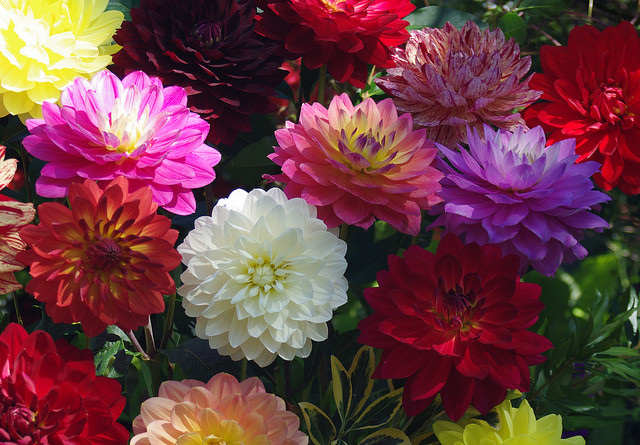

In [2]:
# 先讀取一張圖片
img = Image.open("img/flowers.jpg")
img

In [3]:
# 把圖片看成是陣列(矩陣)
img = np.array(img)
# 寬x長x三原色
img.shape

(445, 640, 3)

# 拆開成三原色
<img src="https://media.giphy.com/media/26xBB4AoSvhGaekNy/giphy.gif" />

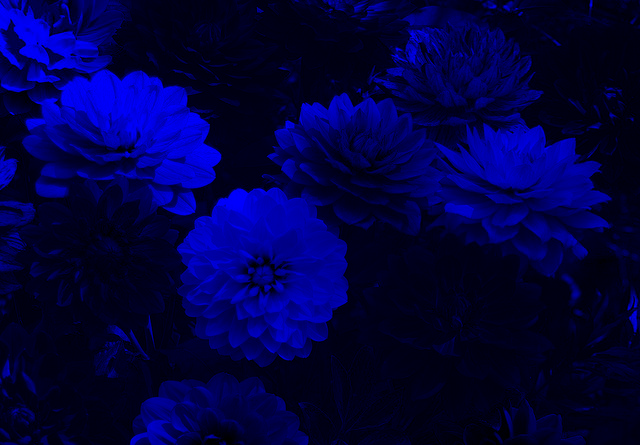

In [4]:
img_b = Image.fromarray(img*np.uint8([0,0,1]))
img_b

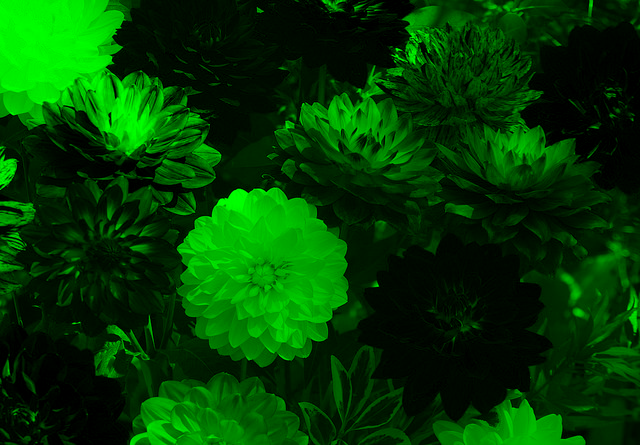

In [5]:
img_g = Image.fromarray(img*np.uint8([0,1,0]))
img_g

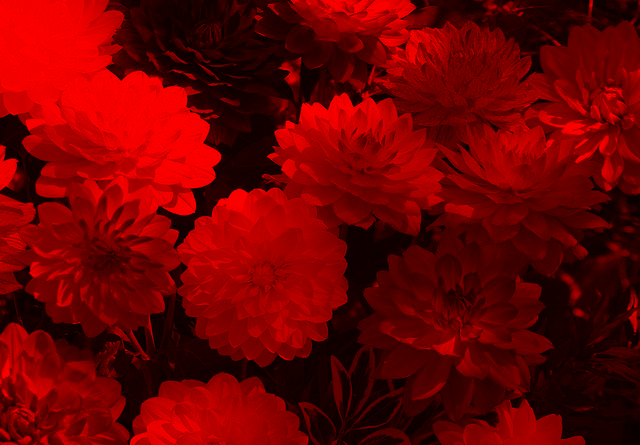

In [6]:
img_r = Image.fromarray(img*np.uint8([1,0,0]))
img_r

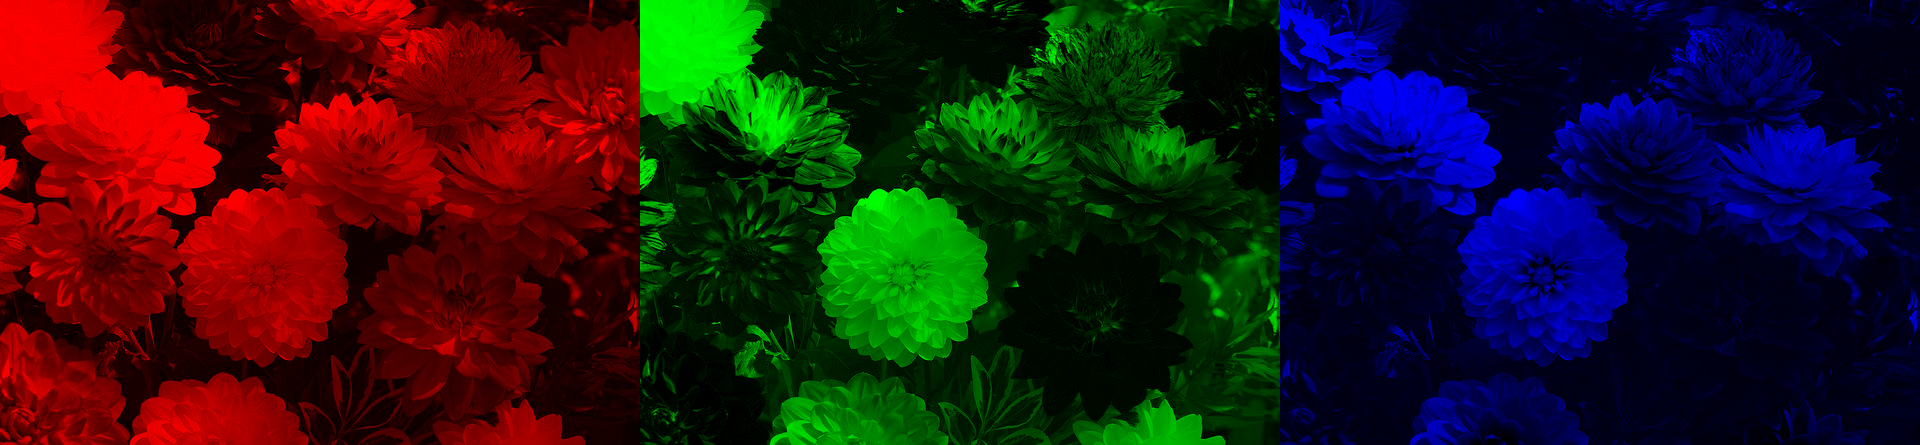

In [7]:
img_rgb = np.concatenate([img_r, img_g, img_b], axis=1)
Image.fromarray(img_rgb)

In [8]:
img = np.array(img)

# 模糊
模糊就是「平均」

## Gaussian Blur
高斯模糊

In [9]:
wimg = widget.Image(width=img.shape[1], height=img.shape[0])
def blur_img(xw, yw):
    blur = cv2.GaussianBlur(img, (xw,yw), 0)
    wimg.value= img_to_png(blur)
interact(blur_img, xw=(1, 35, 2), yw=(1,35,2))
display(wimg)

## 好好的圖，為什麼要弄模糊?

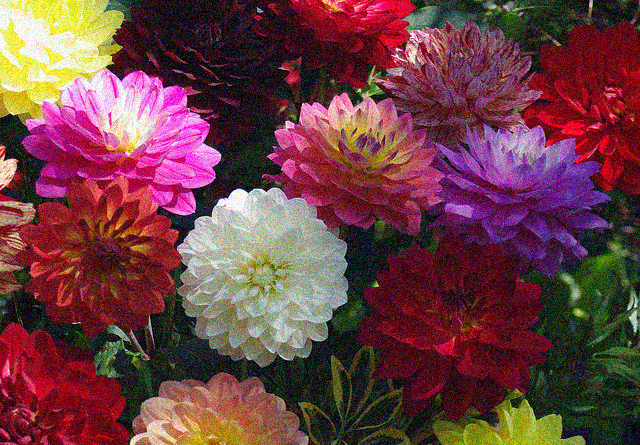

In [10]:
# 圖片常常有雜訊
noise =  np.random.normal(0, 20, size=img.shape)
img_noise = (img + noise).clip(0,255).astype('uint8')
Image.fromarray (img_noise)

In [11]:
wimg = widget.Image(width=img.shape[1], height=img.shape[0])
def blur_img(xw, yw):
    blur = cv2.GaussianBlur(img_noise, (xw,yw), 0)
    wimg.value= img_to_png(blur)
interact(blur_img, xw=(1, 35, 2), yw=(1,35,2))
display(wimg)

## Median
除了平均，也可以試試看中位數

In [12]:
wimg = widget.Image(width=img.shape[1], height=img.shape[0])
def blur_img(xw):
    blur = cv2.medianBlur(img_noise, xw)
    wimg.value= img_to_png(blur)
interact(blur_img, xw=(1, 35, 2))
display(wimg)

# 比較進階的方式，希望能同時保有銳利的邊界
## Bilateral Filtering



${\displaystyle I^{\text{filtered}}(x)={\frac {1}{W_{p}}}\sum _{x_{i}\in \Omega }I(x_{i})f_{r}(\|I(x_{i})-I(x)\|)g_{s}(\|x_{i}-x\|),}$


${\displaystyle W_{p}=\sum _{x_{i}\in \Omega }{f_{r}(\|I(x_{i})-I(x)\|)g_{s}(\|x_{i}-x\|)}} $

In [13]:
wimg = widget.Image(width=img.shape[1], height=img.shape[0])
def blur_img(d, sigmaColor, sigmaSpace):
    blur = cv2.bilateralFilter(img_noise, d, sigmaColor, sigmaSpace)
    wimg.value= img_to_png(blur)
interact(blur_img, d=(1, 25, 2), sigmaColor=75, sigmaSpace=75)
display(wimg)

In [14]:
# 還有很多除雜訊的方式
wimg = widget.Image(width=img.shape[1], height=img.shape[0])
def blur_img(a,b,c,d):
    blur = cv2.fastNlMeansDenoisingColored(img_noise, None, a,b,c,d)
    wimg.value= img_to_png(blur)
interact(blur_img, a=10, b=10, c=7, d=21)
display(wimg)

## 灰階圖
常常我們會先把圖形變成灰階再來處理

$Gray = R \cdot 0.299 + G \cdot 0.587 + B \cdot 0.114$

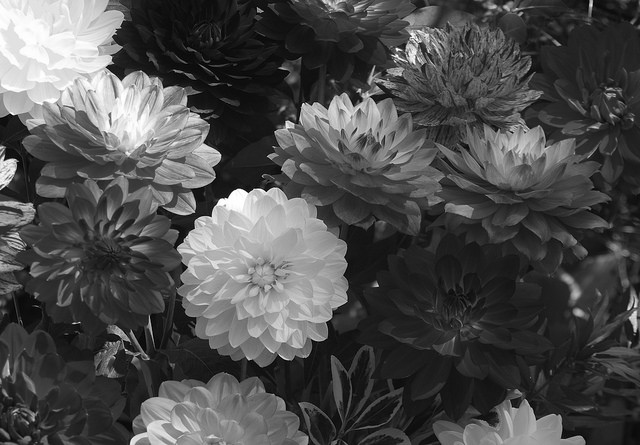

In [15]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
Image.fromarray(gray)

比方我們可以找邊界。
因為邊界比較容易被模糊掉，所以也可以利用原來的圖扣掉模糊過的圖來找邊界

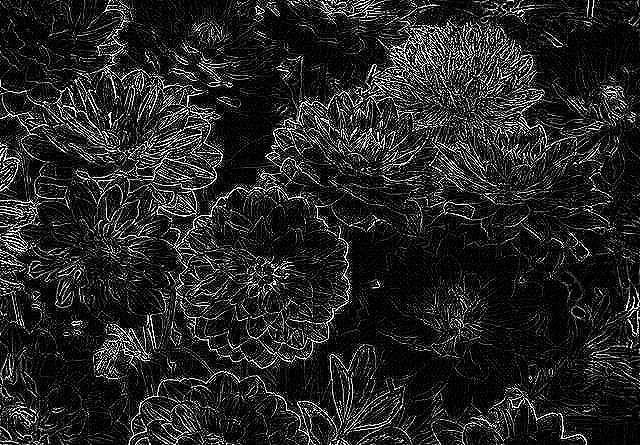

In [16]:
laplacian = cv2.Laplacian(gray/255,cv2.CV_64F)
to_pil(laplacian*5)

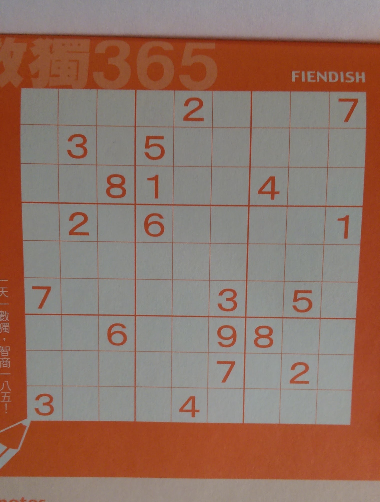

In [17]:
# 應用，看看數獨的圖形
img = Image.open('img/sodoku.jpg')
img = cv2.resize(np.array(img), (img.width//4, img.height//4))
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
to_pil(img)

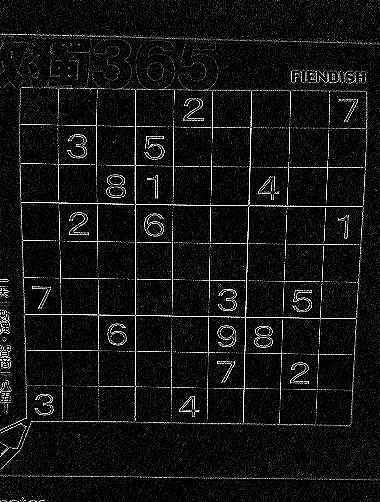

In [18]:
laplacian = cv2.Laplacian(gray/255,cv2.CV_64F)
to_pil(laplacian*5)

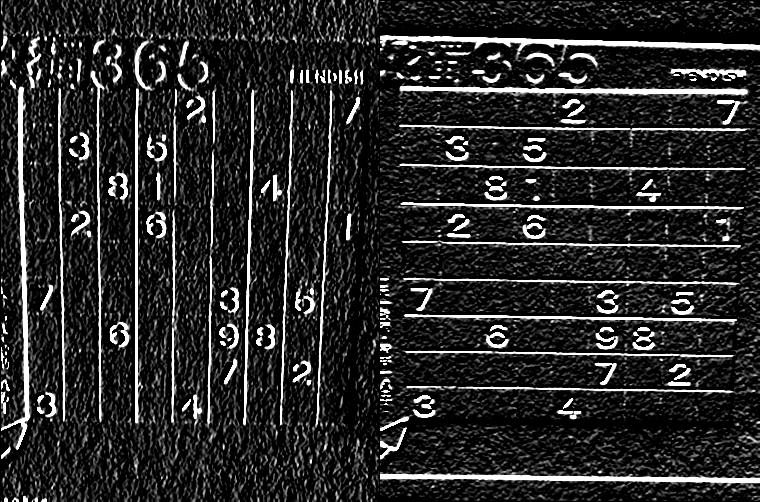

In [19]:
sobelx = cv2.Sobel(gray/255,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(gray/255,cv2.CV_64F,0,1,ksize=5)
to_pil(np.concatenate([sobelx, sobely], axis=1))

# Canny

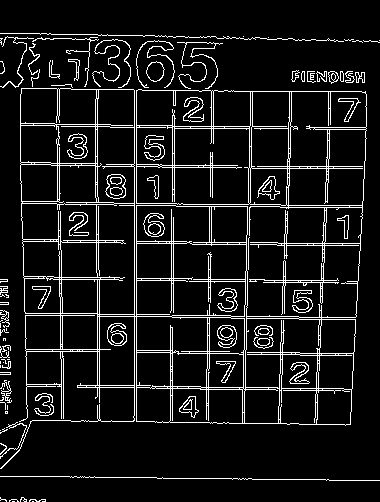

In [20]:
to_pil(cv2.Canny(gray, 20, 100))

## 撲克牌的應用

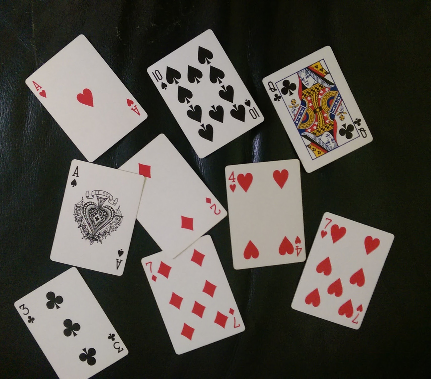

Canny


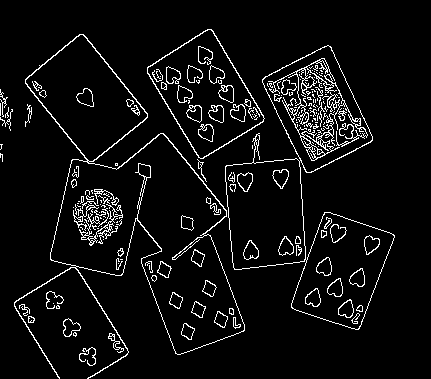

In [21]:
img = Image.open('img/cards.jpg')
img = cv2.resize(np.array(img), (img.width//4, img.height//4))
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
display(to_pil(img))
print("Canny")
display(to_pil(cv2.Canny(gray, 50, 200)))

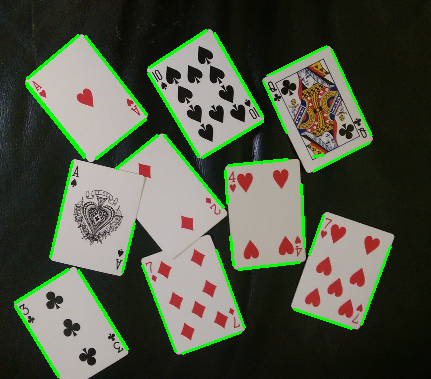

In [22]:
img = Image.open("img/cards.jpg")
img = cv2.resize(np.array(img), (img.width//4, img.height//4))
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
gray = cv2.medianBlur(gray, 9)
edges = cv2.Canny(gray,100,100)
lines = cv2.HoughLinesP(edges,1,np.pi/180,50,minLineLength=10,maxLineGap=5)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
Image.fromarray(img)

# 找出直線

In [23]:
img = Image.open("img/sodoku.jpg")
img = cv2.resize(np.array(img), (img.width, img.height))
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#gray = cv2.medianBlur(gray, 1)
edges = cv2.Canny(gray,30,100)
lines = cv2.HoughLinesP(edges,1,np.pi/180,150,minLineLength=50,maxLineGap=100)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
Image.fromarray(img)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# Corner

可以找直線，也可以找角和其他關鍵點

$E(u,v) = \sum _{x,y} w(x,y)[ I(x+u,y+v) - I(x,y)]^{2}$


$E(u,v) \approx \begin{bmatrix} u & v \end{bmatrix} M \begin{bmatrix} u \\ v \end{bmatrix}$


$R = det(M) - k(trace(M))^{2}$

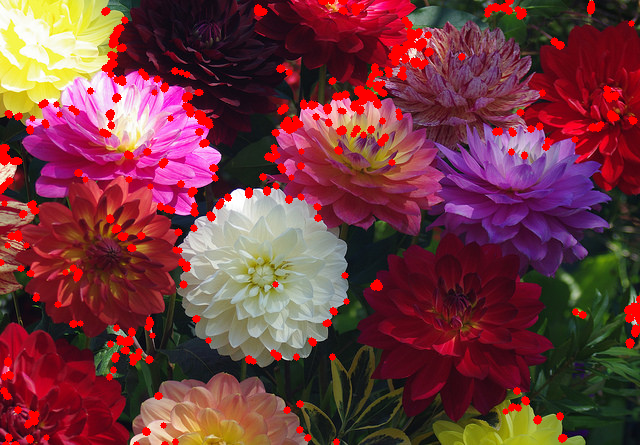

In [24]:
img = np.array(Image.open("img/flowers.jpg"))
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
corners = cv2.cornerHarris(gray, 2, 9, 0.02)
corners = np.int0(corners)
for y,x in zip(*np.nonzero(corners > 200)):
    cv2.circle(img, (x,y), 3, 255, -1)
Image.fromarray(img)

# 有了關鍵點，就能夠追蹤

In [28]:
@interact(fn=["img/clubQ.jpg", "img/spadeA.jpg", "img/spade10.jpg", "img/heartA.jpg", "img/diamond2.jpg"])
def match_cards(fn):
    MIN_MATCH_COUNT = 10
    # 可以用的牌 spadeA.jpg clubQ.jpg heartA.jpg spade10.jpg diamond2.jpg
    img1 = np.array(Image.open(fn)) # queryImage
    img2 = np.array(Image.open('img/cards.jpg')) # trainImage
    # Initiate SIFT detector
    sift = cv2.xfeatures2d.SIFT_create()
    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)
    #matcher  = cv2.FlannBasedMatcher(index_params, search_params) # disabled becuase of opencv 3.1 bug
    matcher = cv2.BFMatcher()    
    matches = matcher.knnMatch(des1, des2, k=2)
    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)

    if len(good)>MIN_MATCH_COUNT:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()
        h,w,d = img1.shape
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)
        img2 = cv2.polylines(img2,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)
    else:
        print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
        matchesMask = None

    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                       singlePointColor = None,
                       matchesMask = matchesMask, # draw only inliers
                       flags = 2)
    img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
    return to_pil(img3)